## Classifying Muffins and Cupcakes with SVM

#### Step 1: Import Packages

In [ ]:
from sklearn.svm import SVC # for classification
from sklearn.svm import SVR # for regression

In [1]:
from sklearn.svm import SVC 

In [2]:
# Packages for analysis
import numpy as np
import pandas as pd

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)
import warnings
warnings.filterwarnings('ignore')

# Allows charts to appear in the notebook
%matplotlib inline

#### Step 2: Import Data

In [3]:
# Read in muffin and cupcake ingredient data
recipes = pd.read_csv('recipes_muffins_cupcakes.csv')
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


In [4]:
# Each category count
recipes.Type.value_counts()

Muffin     10
Cupcake    10
Name: Type, dtype: int64

#### Step 3: Prepare the Data

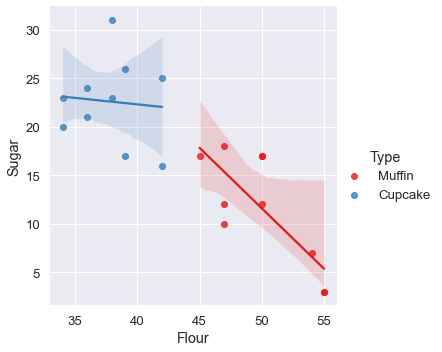

In [5]:
# Plot two ingredients using regression plot
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type',
           palette='Set1')

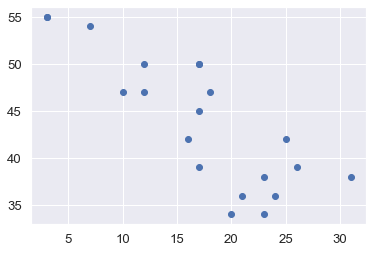

In [6]:
plt.scatter(recipes.Sugar,recipes.Flour)

In [7]:
# Specify inputs for the model
# ingredients = recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']].as_matrix()
# input: X
ingredients = recipes[['Flour','Sugar']]
ingredients[:3]

,Flour,Sugar
0,55,3
1,47,12
2,47,18


In [8]:
recipes.Type[:2]

0    Muffin
1    Muffin
Name: Type, dtype: object

In [9]:
# In Type column we have categorical data, it is needed to be convrted into Numeric
# output y ==> convert muffin as 0 and Cupcake as 1
np.where(recipes['Type']=='Muffin', 0, 1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
recipes.Type.map({'Muffin':0,'Cupcake':1})

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: Type, dtype: int64

In [11]:
# sklearn contains LabelEncoder to convert categorical data into numeric
from sklearn.preprocessing import LabelEncoder

In [12]:
# create an object of LabelEncoder
lb = LabelEncoder()
lb

LabelEncoder()

In [13]:
# fit n transform
type_label = lb.fit_transform(recipes.Type)

In [14]:
type_label[:3]

array([1, 1, 1])

In [15]:
lb.classes_

array(['Cupcake', 'Muffin'], dtype=object)

In [16]:
recipes.Type =type_label

In [17]:
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,1,55,28,3,7,5,2,0,0
1,1,47,24,12,6,9,1,0,0
2,1,47,23,18,6,4,1,0,0
3,1,45,11,17,17,8,1,0,0
4,1,50,25,12,6,5,2,1,0
5,1,55,27,3,7,5,2,1,0
6,1,54,27,7,5,5,2,0,0
7,1,47,26,10,10,4,1,0,0
8,1,50,17,17,8,6,1,0,0
9,1,50,17,17,11,4,1,0,0


#### Step 4: Fit the Model

In [18]:
# Fit the SVM model
# kernel = 'rbf' default
model = SVC()
model.fit(ingredients, type_label)

SVC()

In [19]:
# check data accuracy
model.score(ingredients, type_label)*100

95.0

In [20]:
# Fit the SVM model
model2 = SVC(kernel='linear')
model2.fit(ingredients, type_label)

SVC(kernel='linear')

In [21]:
# check data accuracy
model2.score(ingredients, type_label)*100

100.0

#### Step 5: Visualize Results

In [22]:
ingredients[:2]

,Flour,Sugar
0,55,3
1,47,12


In [23]:
model2.coef_

array([[ 6.66537262e-01, -4.85266891e-05]])

In [24]:
model2.intercept_

array([-28.99349742])

#### Testing

In [25]:
recipes.Type

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: Type, dtype: int32

In [26]:
# flour and sugar data
model2.predict([[20,400]])

array([0])

In [27]:
# check support vectors
model2.support_vectors_

array([[42., 16.],
       [42., 25.],
       [45., 17.]])

In [28]:
# Get the separating hyperplane
w = model2.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model2.intercept_[0]) / w[1] # main hyperplane

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model2.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model2.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

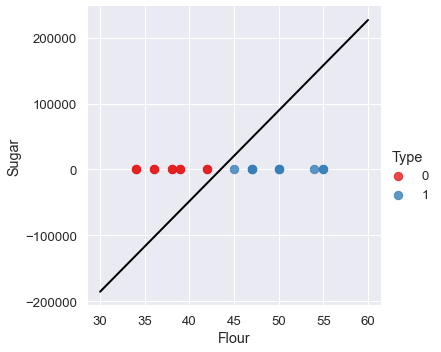

In [29]:
# Plot the hyperplane
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

In [30]:
model2.support_vectors_[:,:]

array([[42., 16.],
       [42., 25.],
       [45., 17.]])

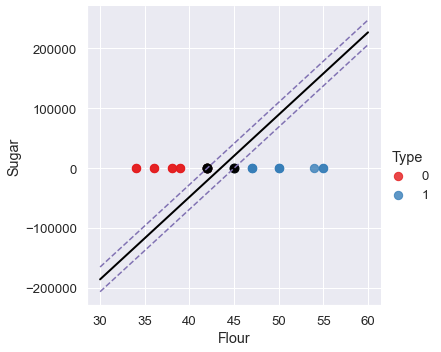

In [31]:
# Look at the margins and support vectors
# data samples
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

plt.plot(xx, yy, linewidth=2, color='black') # hyperplane
plt.plot(xx, yy_down, 'm--') # marginLine1
plt.plot(xx, yy_up, 'm--') # margineLine2
plt.scatter(model2.support_vectors_[:, 0], model2.support_vectors_[:, 1],
            s=80, facecolors='black');

#### Step 6: Predict New Case

In [32]:
# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake(flour, sugar):
    if(model2.predict([[flour, sugar]]))==1:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [33]:
# Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(20,200)

You're looking at a cupcake recipe!


In [34]:
# Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(50,20)

You're looking at a muffin recipe!


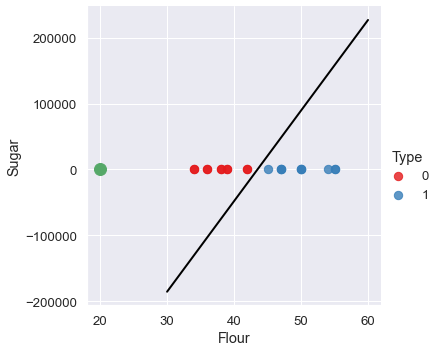

In [35]:
# Plot the point to visually see where the point lies
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(20, 200, 'go', markersize='12') # test input